In [1]:
#Importing the Libraries
import pandas as pd
from pandas import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model

C:\Users\TNBAUTISTA\AppData\Local\Temp\ipykernel_7688\591871176.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
#Get the Dataset
df=pd.read_csv("NewData/JPM2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,63.950001,64.059998,63.009998,63.619999,53.557831,25393200
2016-01-05,63.700001,64.129997,63.040001,63.730000,53.650433,16566700
2016-01-06,62.720001,63.130001,62.340000,62.810001,52.875938,22961500
2016-01-07,61.459999,62.000000,60.080002,60.270000,50.737659,27630900
2016-01-08,61.130001,61.270000,58.849998,58.919998,49.601185,22373300


In [3]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1606, 6)
Null Value Present:  False


<AxesSubplot:xlabel='Date'>

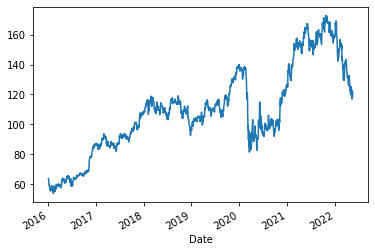

In [5]:
#Plot the True Adj Close Value
df["Open"].plot()

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df["Open"])
#Selecting the Features
features = ['Close', 'High', 'Low', 'Volume']


In [7]:
# Scale the data using MinMax
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Close,High,Low,Volume
Date,,,,
2016-01-04,0.088872,0.085258,0.089038,0.417434
2016-01-05,0.089799,0.085846,0.089292,0.250480
2016-01-06,0.082049,0.077446,0.083362,0.371438
2016-01-07,0.060652,0.067955,0.064216,0.459760
2016-01-08,0.049280,0.061823,0.053795,0.360312


In [8]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [10]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
from keras.models import load_model

from keras.utils.vis_utils import plot_model

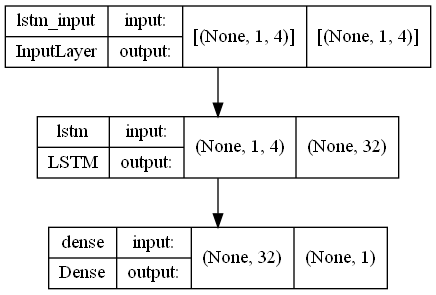

In [11]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [12]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
183/183 [==============================] - 1s 1ms/step - loss: 11693.0420
Epoch 2/100
183/183 [==============================] - 0s 1ms/step - loss: 11096.8896
Epoch 3/100
183/183 [==============================] - 0s 1ms/step - loss: 9914.2676
Epoch 4/100
183/183 [==============================] - 0s 1ms/step - loss: 8292.8164
Epoch 5/100
183/183 [==============================] - 0s 1ms/step - loss: 6509.2930
Epoch 6/100
183/183 [==============================] - 0s 1ms/step - loss: 4790.9331
Epoch 7/100
183/183 [==============================] - 0s 1ms/step - loss: 3290.0474
Epoch 8/100
183/183 [==============================] - 0s 1ms/step - loss: 2091.5994
Epoch 9/100
183/183 [==============================] - 0s 1ms/step - loss: 1220.3651
Epoch 10/100
183/183 [==============================] - 0s 1ms/step - loss: 649.9667
Epoch 11/100
183/183 [==============================] - 0s 1ms/step - loss: 318.3904
Epoch 12/100
183/183 [==============================] - 0s 1ms/

In [13]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4736      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [13]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred

array([[169.13576 ],
       [169.3048  ],
       [170.57161 ],
       [170.84927 ],
       [170.89714 ],
       [168.1122  ],
       [169.06506 ],
       [169.97212 ],
       [169.86098 ],
       [169.8204  ],
       [169.70338 ],
       [167.79686 ],
       [168.03726 ],
       [169.1006  ],
       [167.1389  ],
       [167.43971 ],
       [167.30508 ],
       [166.31891 ],
       [166.37476 ],
       [165.4132  ],
       [164.0486  ],
       [163.14    ],
       [160.44786 ],
       [163.9208  ],
       [166.8041  ],
       [167.13142 ],
       [160.68457 ],
       [161.56178 ],
       [158.80235 ],
       [159.37056 ],
       [160.67773 ],
       [158.78978 ],
       [160.41223 ],
       [161.9963  ],
       [161.02992 ],
       [159.6606  ],
       [159.90758 ],
       [158.03833 ],
       [158.76411 ],
       [158.05287 ],
       [159.7942  ],
       [156.51036 ],
       [153.22607 ],
       [155.8797  ],
       [156.1356  ],
       [157.66122 ],
       [157.3493  ],
       [158.7

In [14]:
JPM_Prediction = pd.DataFrame(y_pred)
JPM_Prediction

,0
0,169.135757
1,169.304794
2,170.571609
3,170.849274
4,170.897141
...,...
141,117.407784
142,119.272224
143,118.488792
144,122.154564


In [15]:
# write BAC Prediction list to csv
JPM_Prediction.to_csv("Outputs/JPM_Prediction.csv", index=False)

In [16]:
from jupyterthemes import jtplot

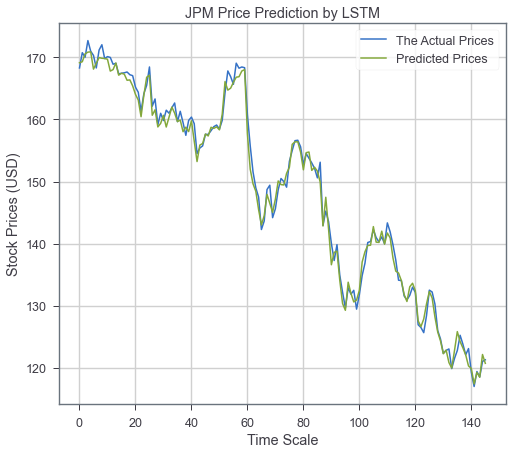

In [17]:
#Predicted vs True Adj Close Value – LSTM
jtplot.style(theme='grade3',context='notebook',ticks=True,grid=True)
plt.plot(y_test, label='The Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title("JPM Price Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Stock Prices (USD)')
plt.legend()
plt.show()
#plt.savefig("BAC_LSTM_graph")



In [18]:
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
import requests
import keras
from keras.models import load_model
from sklearn import preprocessing
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [19]:
def denormalize(df, normalized_value):
    df = df['Open'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)

    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new
p = lstm.predict(X_test)
newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [20]:
# use F score to measure the model

def model_F_score(newp,newy_test):
    TP=0
    FN=0
    FP=0
    for i in range(len(newp)-1):
        test_prof=newy_test[i+1]-newy_test[i]
        p_prof=newp[i+1] - newp[i]

        if((test_prof>=0) and (p_prof>=0)):
            TP=TP+1
        if ((test_prof>= 0) and (p_prof<0)):
            FN=FN+1
        if ((test_prof<0) and (p_prof>=0)):
            FP=FP+1

    Precision=float(TP)/float(TP+FP)
    Recall=float(TP)/float(TP+FN)

    Fscore= 2.0*Precision*Recall/(Precision+Recall)
    print('classification F score: %.5f' % (Fscore))
    return Fscore
    
testScore = math.sqrt(mean_squared_error(newp, newy_test))
print('Test Score: %.2f RMSE' % (testScore))

F_score=model_F_score(newp,newy_test)
print ('F_score',F_score)

Test Score: 161.61 RMSE
classification F score: 0.74453
F_score 0.7445255474452556
